In [3]:
## Instruction for knitting....markdown doc

# ```{r global_options, include=FALSE}
# knitr::opts_chunk$set(echo=FALSE, warning=FALSE, message=FALSE)
# ```

In [4]:
## Which chemical properties influence the quality of red wines?

library(ggplot2)

## ?warn
## options(warn=-1) #To suppress the warning globally
## but not a good idea
options(warn=0) #To resume the warning

df <- read.csv('wineQualityReds.csv')
head(df)
str(df)
summary(df)

Warning message:
"package 'ggplot2' was built under R version 3.4.3"

X,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5


'data.frame':	1599 obs. of  13 variables:
 $ X                   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ fixed.acidity       : num  7.4 7.8 7.8 11.2 7.4 7.4 7.9 7.3 7.8 7.5 ...
 $ volatile.acidity    : num  0.7 0.88 0.76 0.28 0.7 0.66 0.6 0.65 0.58 0.5 ...
 $ citric.acid         : num  0 0 0.04 0.56 0 0 0.06 0 0.02 0.36 ...
 $ residual.sugar      : num  1.9 2.6 2.3 1.9 1.9 1.8 1.6 1.2 2 6.1 ...
 $ chlorides           : num  0.076 0.098 0.092 0.075 0.076 0.075 0.069 0.065 0.073 0.071 ...
 $ free.sulfur.dioxide : num  11 25 15 17 11 13 15 15 9 17 ...
 $ total.sulfur.dioxide: num  34 67 54 60 34 40 59 21 18 102 ...
 $ density             : num  0.998 0.997 0.997 0.998 0.998 ...
 $ pH                  : num  3.51 3.2 3.26 3.16 3.51 3.51 3.3 3.39 3.36 3.35 ...
 $ sulphates           : num  0.56 0.68 0.65 0.58 0.56 0.56 0.46 0.47 0.57 0.8 ...
 $ alcohol             : num  9.4 9.8 9.8 9.8 9.4 9.4 9.4 10 9.5 10.5 ...
 $ quality             : int  5 5 5 6 5 5 5 7 7 5 ...


       X          fixed.acidity   volatile.acidity  citric.acid   
 Min.   :   1.0   Min.   : 4.60   Min.   :0.1200   Min.   :0.000  
 1st Qu.: 400.5   1st Qu.: 7.10   1st Qu.:0.3900   1st Qu.:0.090  
 Median : 800.0   Median : 7.90   Median :0.5200   Median :0.260  
 Mean   : 800.0   Mean   : 8.32   Mean   :0.5278   Mean   :0.271  
 3rd Qu.:1199.5   3rd Qu.: 9.20   3rd Qu.:0.6400   3rd Qu.:0.420  
 Max.   :1599.0   Max.   :15.90   Max.   :1.5800   Max.   :1.000  
 residual.sugar     chlorides       free.sulfur.dioxide total.sulfur.dioxide
 Min.   : 0.900   Min.   :0.01200   Min.   : 1.00       Min.   :  6.00      
 1st Qu.: 1.900   1st Qu.:0.07000   1st Qu.: 7.00       1st Qu.: 22.00      
 Median : 2.200   Median :0.07900   Median :14.00       Median : 38.00      
 Mean   : 2.539   Mean   :0.08747   Mean   :15.87       Mean   : 46.47      
 3rd Qu.: 2.600   3rd Qu.:0.09000   3rd Qu.:21.00       3rd Qu.: 62.00      
 Max.   :15.500   Max.   :0.61100   Max.   :72.00       Max.   :289.0

In [5]:
any(is.na(df))
## That is amazing, we don't have missing values in the dataset
# df$quality = as.factor(df$quality)
# df$quality = as.numeric(df$quality)
str(df)

[1] FALSE

'data.frame':	1599 obs. of  13 variables:
 $ X                   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ fixed.acidity       : num  7.4 7.8 7.8 11.2 7.4 7.4 7.9 7.3 7.8 7.5 ...
 $ volatile.acidity    : num  0.7 0.88 0.76 0.28 0.7 0.66 0.6 0.65 0.58 0.5 ...
 $ citric.acid         : num  0 0 0.04 0.56 0 0 0.06 0 0.02 0.36 ...
 $ residual.sugar      : num  1.9 2.6 2.3 1.9 1.9 1.8 1.6 1.2 2 6.1 ...
 $ chlorides           : num  0.076 0.098 0.092 0.075 0.076 0.075 0.069 0.065 0.073 0.071 ...
 $ free.sulfur.dioxide : num  11 25 15 17 11 13 15 15 9 17 ...
 $ total.sulfur.dioxide: num  34 67 54 60 34 40 59 21 18 102 ...
 $ density             : num  0.998 0.997 0.997 0.998 0.998 ...
 $ pH                  : num  3.51 3.2 3.26 3.16 3.51 3.51 3.3 3.39 3.36 3.35 ...
 $ sulphates           : num  0.56 0.68 0.65 0.58 0.56 0.56 0.46 0.47 0.57 0.8 ...
 $ alcohol             : num  9.4 9.8 9.8 9.8 9.4 9.4 9.4 10 9.5 10.5 ...
 $ quality             : int  5 5 5 6 5 5 5 7 7 5 ...



  3   4   5   6   7   8 
 10  53 681 638 199  18 

[1] 5.636023

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


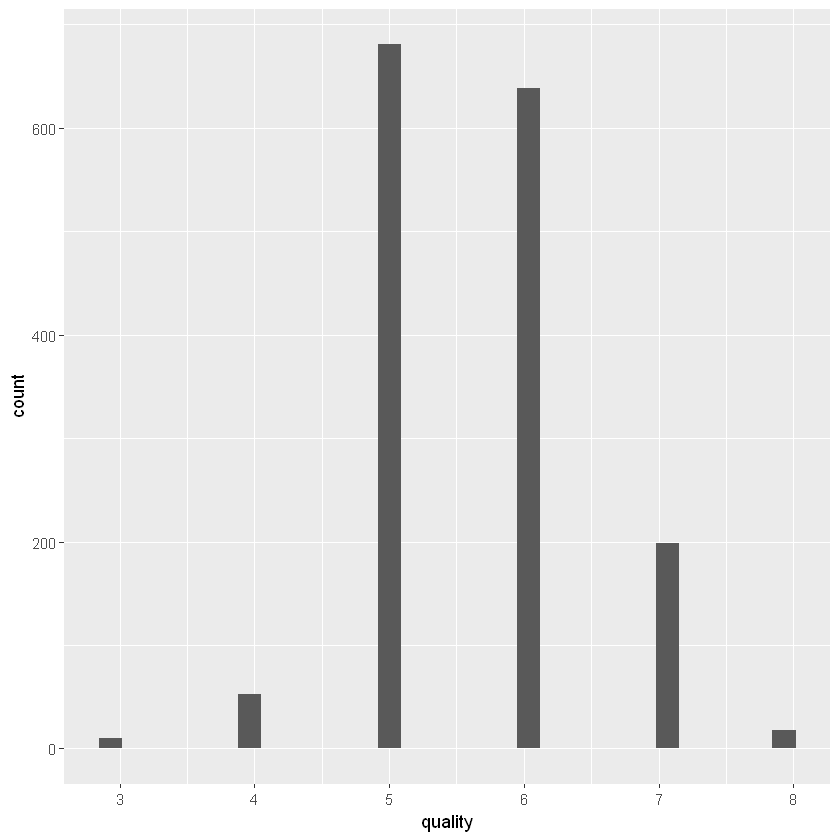

In [70]:
table(df$quality)
mean(df$quality)
ggplot(aes(x=quality), data=df)+
     geom_histogram()
## It is ugly lets fix itggplot(wine, aes(x=factor(quality))) + geom_bar()

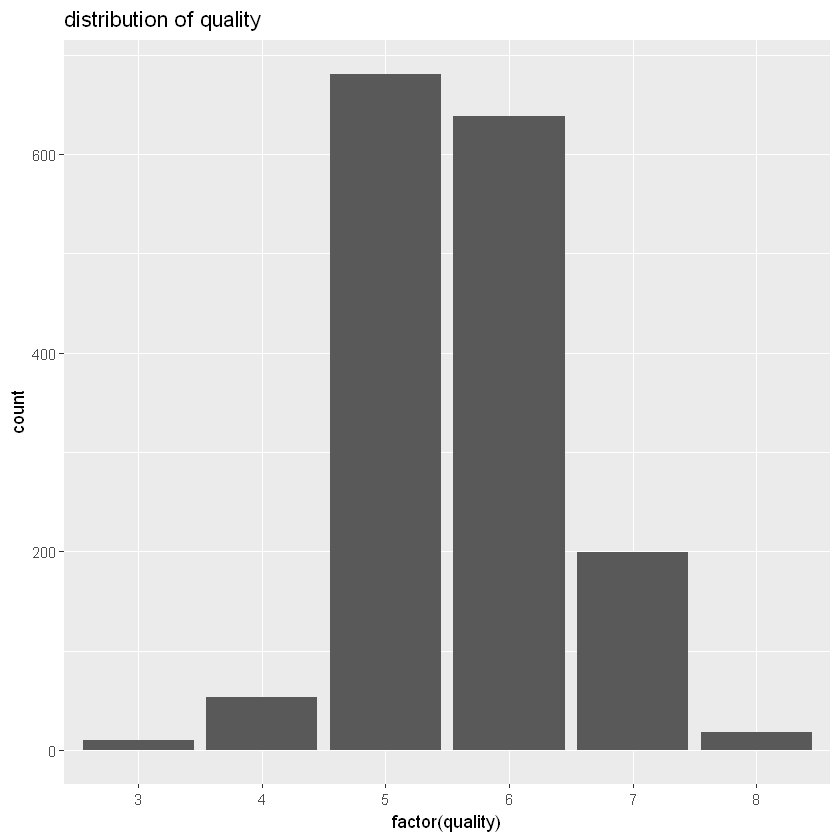

In [14]:
ggplot(df, aes(x=factor(quality))) + geom_bar() +ggtitle("distribution of quality")

In [11]:
names(subset(df, select=-X))

## Should try to figure out, how to write a function for 
## grid.arrange()

[1] "fixed.acidity"        "volatile.acidity"     "citric.acid"         
 [4] "residual.sugar"       "chlorides"            "free.sulfur.dioxide" 
 [7] "total.sulfur.dioxide" "density"              "pH"                  
[10] "sulphates"            "alcohol"              "quality"

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


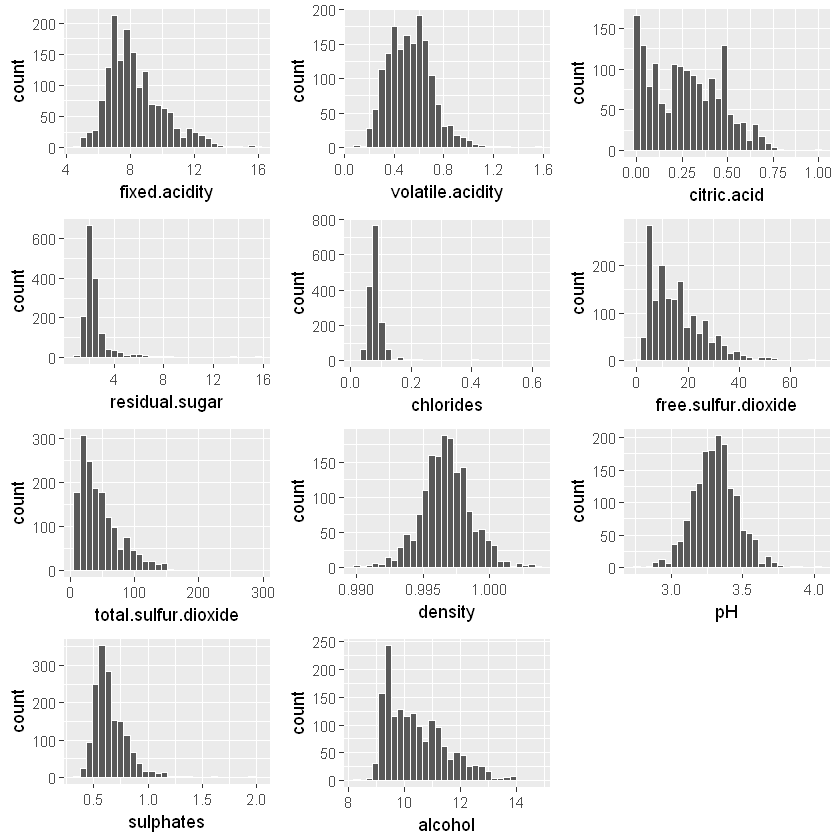

In [59]:
# Looking at the summary table above, it appearsthat residual.sugar, 
# chlorides, total.sulfur.dioxide and sulphates appear to have outliers
## Lets draw histograms of all the eleven variables

library(gridExtra)
p1 = ggplot(aes(x=fixed.acidity), data=df)+
    geom_histogram(color='white')
p2 = ggplot(aes(x=volatile.acidity), data=df)+
    geom_histogram(color='white')
p3 = ggplot(aes(x=citric.acid), data=df)+
    geom_histogram(color='white')
p4 = ggplot(aes(x=residual.sugar), data=df)+
    geom_histogram(color='white')
p5 = ggplot(aes(x=chlorides), data=df)+
    geom_histogram(color='white')
p6 = ggplot(aes(x=free.sulfur.dioxide), data=df)+
    geom_histogram(color='white')
p7 = ggplot(aes(x=total.sulfur.dioxide), data=df)+
    geom_histogram(color='white')
p8 = ggplot(aes(x=density), data=df)+
    geom_histogram(color='white')
p9 = ggplot(aes(x=pH), data=df)+
    geom_histogram(color='white')
p10 = ggplot(aes(x=sulphates), data=df)+
    geom_histogram(color='white')
p11 = ggplot(aes(x=alcohol), data=df)+
    geom_histogram(color='white')

grid.arrange(p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


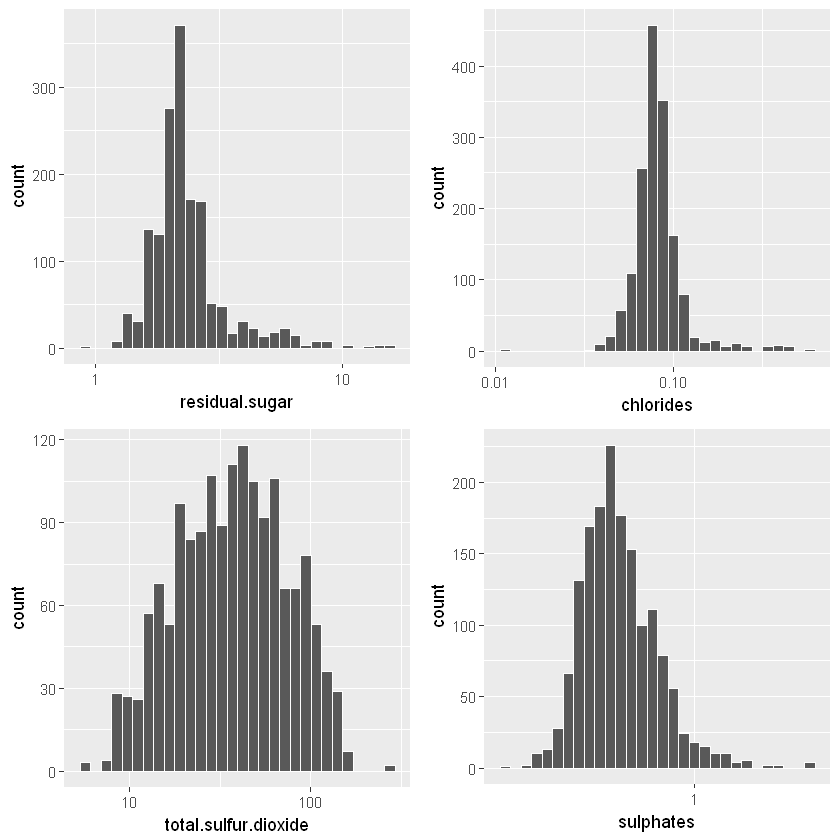

In [60]:
## Our suscpicion was correct
## Out of the eleven plots above; residual.sugar, chlorides
## total.sulfur.dioxide and sulphates appear to have long tails
## lets create a set of new histograms on log10 scale

p1 = ggplot(aes(x=residual.sugar), binwidth=0.01, data=df)+
    geom_histogram(color='white')+
    scale_x_log10()

p2 = ggplot(aes(x=chlorides), binwidth = 0.001, data=df)+
    geom_histogram(color='white') +
    scale_x_log10()

p3 = ggplot(aes(x=total.sulfur.dioxide), binwidth = 0.001, data=df)+
    geom_histogram(color='white') +
    scale_x_log10()

p4 = ggplot(aes(x=sulphates), binwidth = 0.001, data=df)+
    geom_histogram(color='white') +
    scale_x_log10()

grid.arrange(p1,p2,p3,p4)

## We can see these distributions are almost normal

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


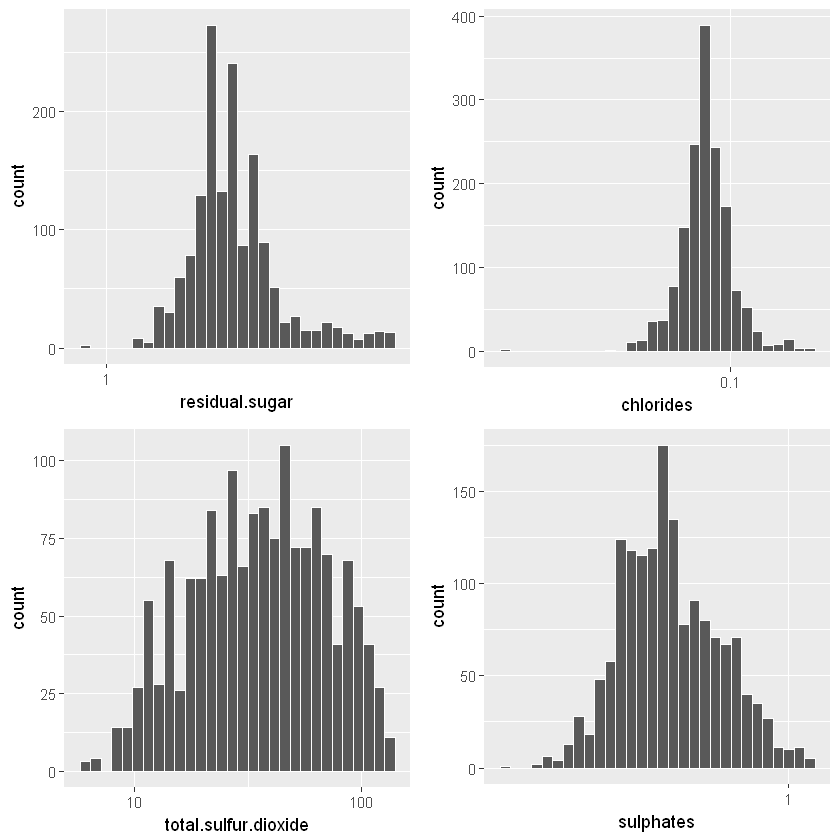

In [62]:
# Lets trim the top 2.5% data and see what happens

p1 = ggplot(aes(x=residual.sugar), binwidth=0.01, 
            data=subset(df, residual.sugar<=quantile(residual.sugar,0.975)))+
    geom_histogram(color='white')+
    scale_x_log10()

p2 = ggplot(aes(x=chlorides), binwidth = 0.001, 
            data=subset(df, chlorides<=quantile(chlorides,0.975)))+
    geom_histogram(color='white') +
    scale_x_log10()

p3 = ggplot(aes(x=total.sulfur.dioxide), binwidth = 0.001, 
            data=subset(df, 
                total.sulfur.dioxide<=quantile(total.sulfur.dioxide,0.975)))+
    geom_histogram(color='white') +
    scale_x_log10()

p4 = ggplot(aes(x=sulphates), binwidth = 0.001, 
            data=subset(df, sulphates<=quantile(sulphates,0.975)))+
    geom_histogram(color='white') +
    scale_x_log10()

grid.arrange(p1,p2,p3,p4)

## Bivariate Analysis:

In [22]:
?ggpairs

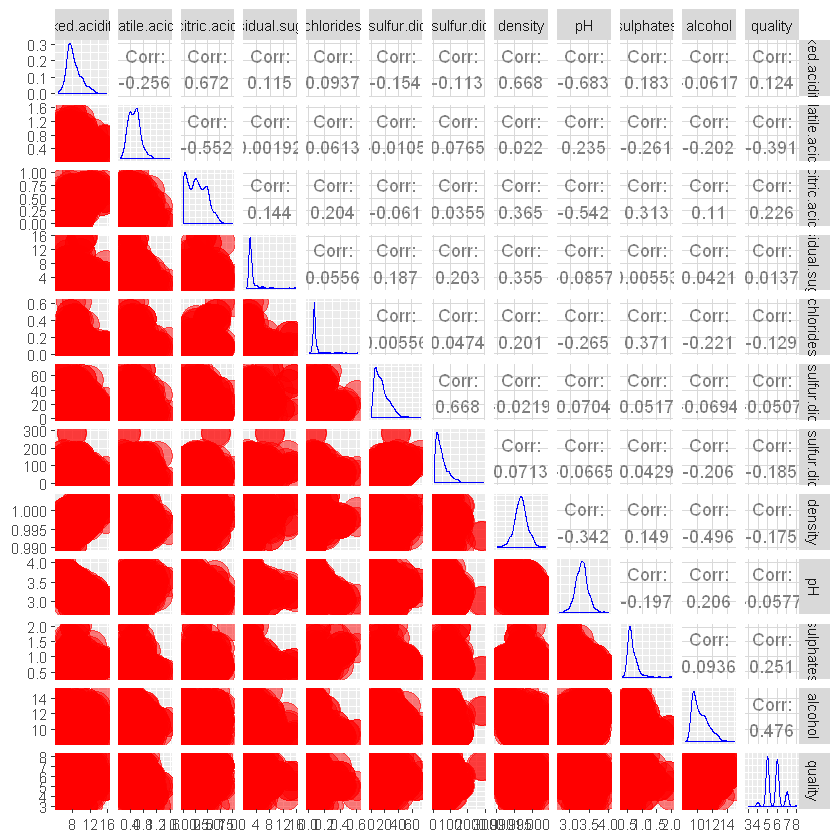

In [20]:
## Before, we dive deep, let's have a casual look at the 
## relationship between the each pair of variables

library(GGally)

# df1= df[,c(2:13)] #using the variable name is a better practice
df1 <- subset(df, select = -c(X))
## OR df1 <- df[ , !names(df) %in% c("varname")]

# ggpairs(df1)
# ggsave("plot_matrix.png", width=24, height=24)

## To enhance the readability

# ggpairs(df1) + 
#     theme(axis.ticks = element_blank(),
#         axis.text = element_blank())     +
#     ggtitle("matrix_plot")

## It appears that if we had quality as a factor rather than 
## numeric it would give a better insight in the data

ggpairs(df1 , 
        lower = list(continuous = wrap("points", color = "red", alpha = 0.5, size=8), 
                     combo = wrap("box", color = "orange", alpha = 0.3), 
                     discrete = wrap("facetbar", color = "yellow", alpha = 0.3) ), 
        diag = list(continuous = wrap("densityDiag",  color = "blue", alpha = 0.5) ))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


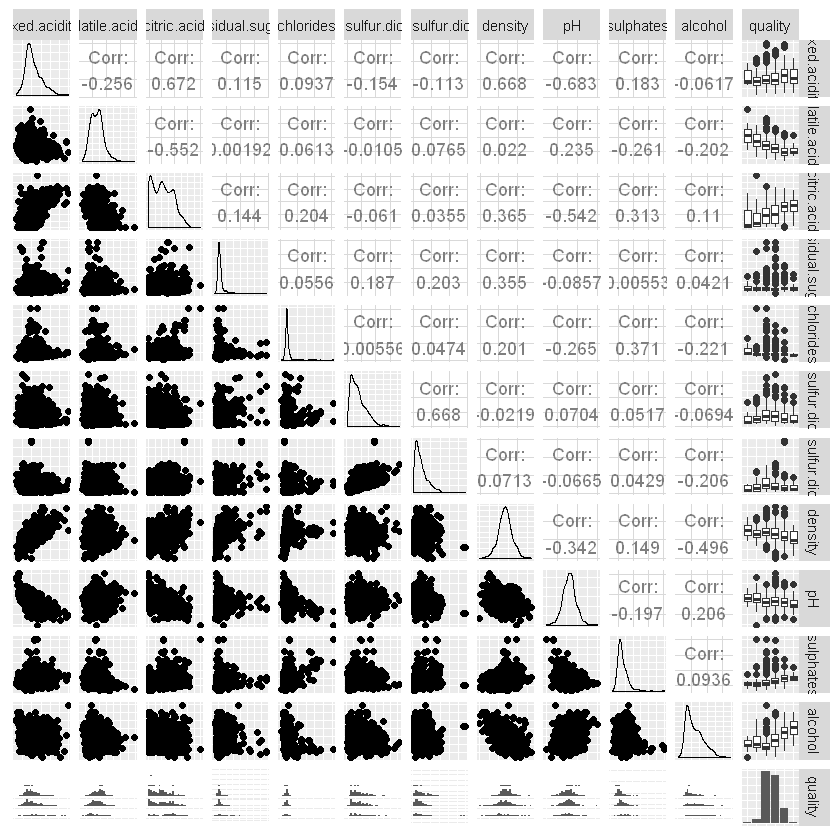

In [8]:
df1= df[,c(2:13)]
df1$quality = factor(df1$quality)
ggpairs(df1) + theme(
        axis.ticks = element_blank(),
        axis.text = element_blank())
ggsave("plot_matrix1.png", width=12, height=12)

`geom_smooth()` using method = 'gam'
Warning message:
"Removed 6 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 6 rows containing missing values (geom_point)."`geom_smooth()` using method = 'gam'
`geom_smooth()` using method = 'gam'
Warning message:
"Removed 4 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 4 rows containing missing values (geom_point)."`geom_smooth()` using method = 'gam'
Warning message:
"Removed 9 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 9 rows containing missing values (geom_point)."

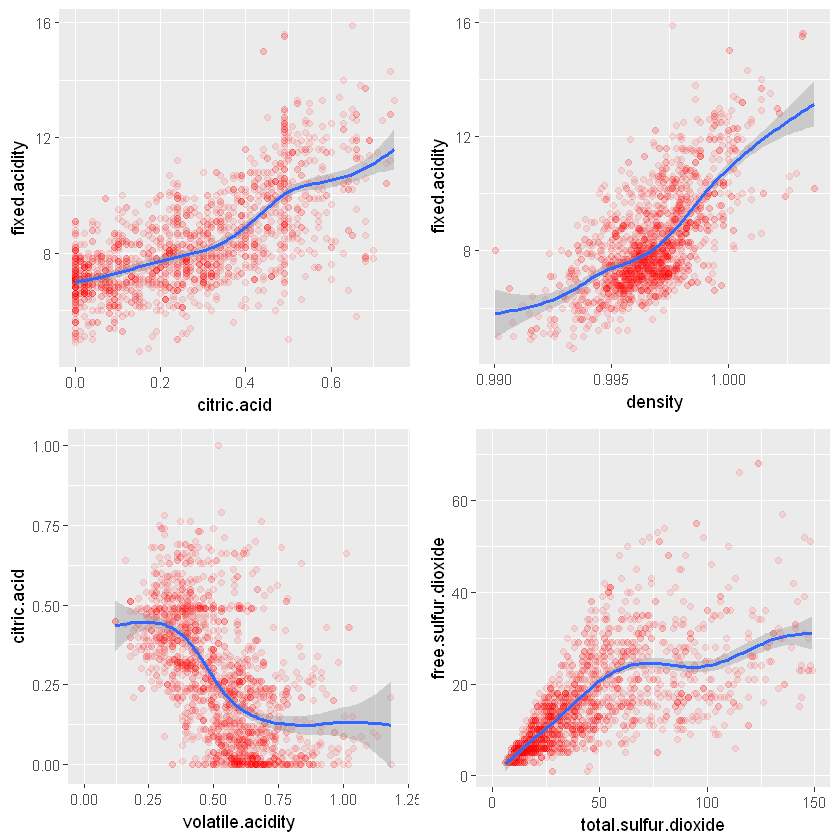

In [111]:
## We can see there is quite significant co-relation exist among:
## citric.acid vs fixed.acidity, density vs fixed.acidity
## volatile.acidity vs citric.acid and total.sulfur.dioxide vs free.sulfur dioxide

p1 = ggplot(aes(x=citric.acid, y=fixed.acidity), data=df)+
    geom_point(alpha=0.1, color='red') +
    geom_smooth(data=df, method='auto') +
     scale_x_continuous(limits = c(0,0.75))
p2 = ggplot(aes(x=density, y=fixed.acidity), data=df)+
    geom_point(alpha=0.1, color='red') +
    geom_smooth(data=df, method='auto')
p3 = ggplot(aes(x=volatile.acidity, y=citric.acid), data=df)+
    geom_point(alpha=0.1, color='red') +
    geom_smooth(data=df, method='auto') + 
     scale_x_continuous(limits = c(0,1.2))
p4 = ggplot(aes(x=total.sulfur.dioxide, y=free.sulfur.dioxide), data=df)+
    geom_point(alpha=0.1, color='red') +
    geom_smooth(data=df, method='auto') +
     scale_x_continuous(limits = c(0,150))

grid.arrange(p1,p2,p3,p4)

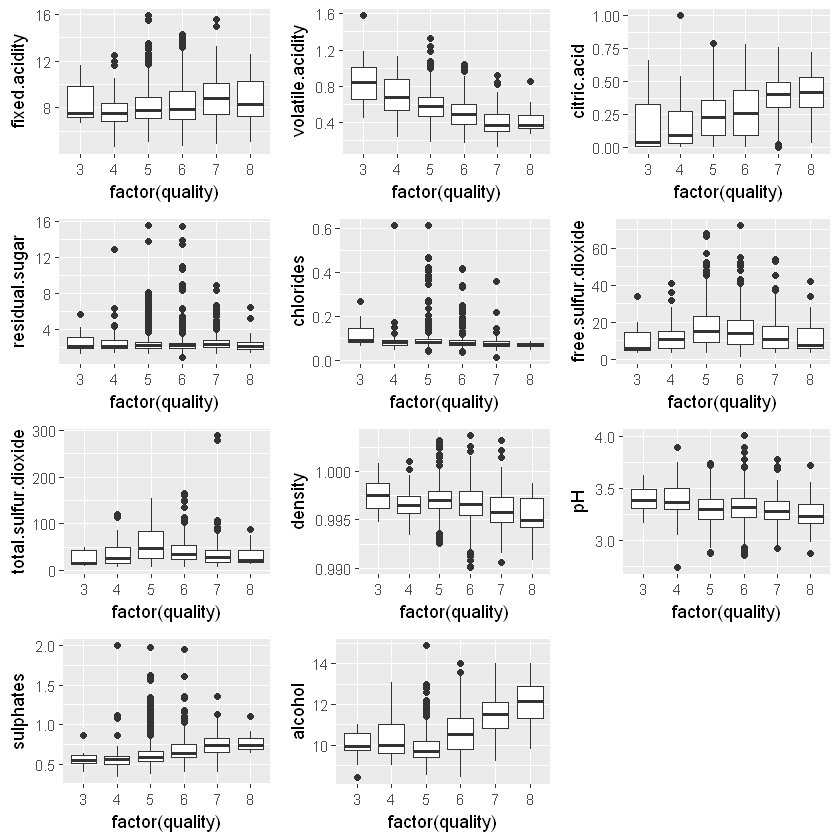

In [74]:
## Lets see how does each of the features vary with the quality of wine


p1 = ggplot(aes(y=fixed.acidity, x=factor(quality)), data=df)+
    geom_boxplot()
p2 = ggplot(aes(y=volatile.acidity, x=factor(quality)), data=df)+
    geom_boxplot()
p3 = ggplot(aes(y=citric.acid, x=factor(quality)), data=df)+
    geom_boxplot()
p4 = ggplot(aes(y=residual.sugar, x=factor(quality)), data=df)+
    geom_boxplot()
p5 = ggplot(aes(y=chlorides, x=factor(quality)), data=df)+
    geom_boxplot()
p6 = ggplot(aes(y=free.sulfur.dioxide, x=factor(quality)), data=df)+
    geom_boxplot()
p7 = ggplot(aes(y=total.sulfur.dioxide, x=factor(quality)), data=df)+
    geom_boxplot()
p8 = ggplot(aes(y=density, x=factor(quality)), data=df)+
    geom_boxplot()
p9 = ggplot(aes(y=pH, x=factor(quality)), data=df)+
    geom_boxplot()
p10 = ggplot(aes(y=sulphates, x=factor(quality)), data=df)+
    geom_boxplot()
p11 = ggplot(aes(y=alcohol, x=factor(quality)), data=df)+
    geom_boxplot()
grid.arrange(p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11)

In [ ]:
## We can confidently say that the quality of wine
## on an average increases with fixed.acidity, citric.acid
## sulphates and alcohol.

## And the quality of wine decraeses with volatile.acidity
## density and pH

## Further, residual sugar, chlorides and total.sulfur.dioxide
## need further investigation.

df$quality: 3
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.200   1.875   2.100   2.635   3.100   5.700 
------------------------------------------------------------ 
df$quality: 4
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.300   1.900   2.100   2.694   2.800  12.900 
------------------------------------------------------------ 
df$quality: 5
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.200   1.900   2.200   2.529   2.600  15.500 
------------------------------------------------------------ 
df$quality: 6
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.900   1.900   2.200   2.477   2.500  15.400 
------------------------------------------------------------ 
df$quality: 7
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.200   2.000   2.300   2.721   2.750   8.900 
------------------------------------------------------------ 
df$quality: 8
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.400   1.800   2.100   2.578   2.600   6.400 

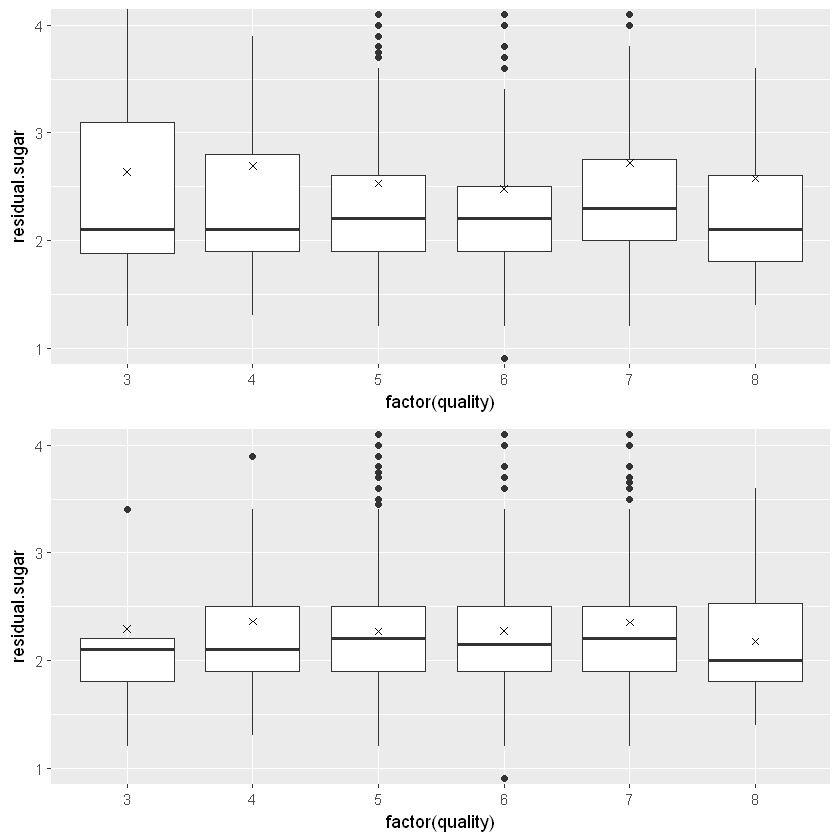

In [249]:
p1 = ggplot(aes(y=residual.sugar, x=factor(quality)), data=df)+
    geom_boxplot() +
    coord_cartesian(ylim = c(1, 4)) +
    stat_summary(fun.y=mean, geom = 'point', shape=4)
p2 = ggplot(aes(y=residual.sugar, x=factor(quality)), 
       data=subset(df, residual.sugar<=quantile(residual.sugar, 0.95)))+
    geom_boxplot() +
    coord_cartesian(ylim = c(1, 4)) +
    stat_summary(fun.y=mean, geom = 'point', shape=4)
grid.arrange(p1,p2)

by(df$residual.sugar, df$quality, summary)

## We have some big outliers here.
## Still we can't say confidently, how does residual.sugar affects the
## quality of wine

df$quality: 3
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0610  0.0790  0.0905  0.1225  0.1430  0.2670 
------------------------------------------------------------ 
df$quality: 4
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.04500 0.06700 0.08000 0.09068 0.08900 0.61000 
------------------------------------------------------------ 
df$quality: 5
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.03900 0.07400 0.08100 0.09274 0.09400 0.61100 
------------------------------------------------------------ 
df$quality: 6
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.03400 0.06825 0.07800 0.08496 0.08800 0.41500 
------------------------------------------------------------ 
df$quality: 7
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.01200 0.06200 0.07300 0.07659 0.08700 0.35800 
------------------------------------------------------------ 
df$quality: 8
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.04400 0.06200 0.07050 0.06844 0.07550 0.08600 

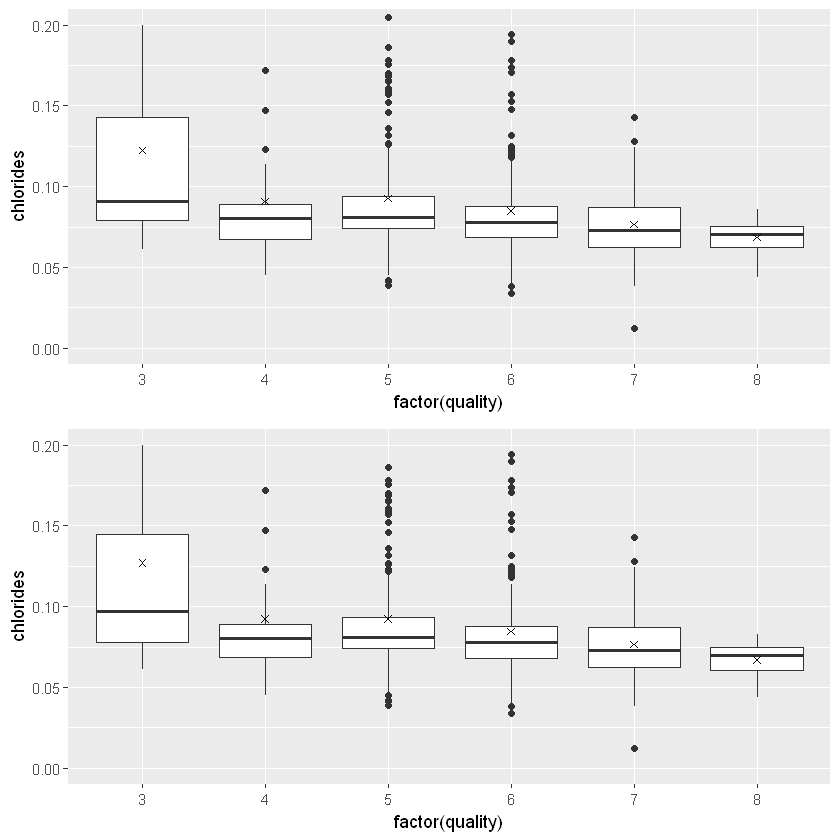

In [113]:
p1 = ggplot(aes(y=chlorides, x=factor(quality)), data=df)+
    geom_boxplot() +
    coord_cartesian(ylim = c(0, 0.2)) +
    stat_summary(fun.y=mean, geom = 'point', shape=4)
p2 = ggplot(aes(y=chlorides, x=factor(quality)), 
       data=subset(df, residual.sugar<=quantile(residual.sugar, 0.95)))+
    geom_boxplot() +
    coord_cartesian(ylim = c(0, 0.2)) +
    stat_summary(fun.y=mean, geom = 'point', shape=4)
grid.arrange(p1,p2)

by(df$chlorides, df$quality, summary)
## Here we can confidently say that as chlorides decrease
## on an average quality of the wine improves

df$quality: 3
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    9.0    12.5    15.0    24.9    42.5    49.0 
------------------------------------------------------------ 
df$quality: 4
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   7.00   14.00   26.00   36.25   49.00  119.00 
------------------------------------------------------------ 
df$quality: 5
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   6.00   26.00   47.00   56.51   84.00  155.00 
------------------------------------------------------------ 
df$quality: 6
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   6.00   23.00   35.00   40.87   54.00  165.00 
------------------------------------------------------------ 
df$quality: 7
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   7.00   17.50   27.00   35.02   43.00  289.00 
------------------------------------------------------------ 
df$quality: 8
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  12.00   16.00   21.50   33.44   43.00   88.00 

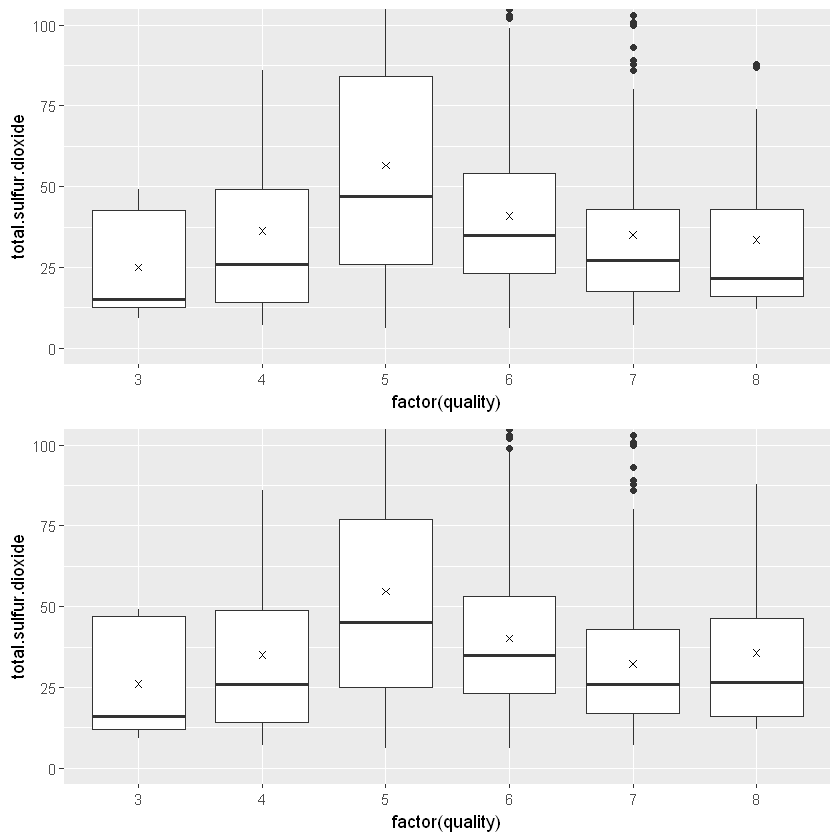

In [250]:
p1 = ggplot(aes(y=total.sulfur.dioxide, x=factor(quality)), data=df)+
    geom_boxplot() +
    coord_cartesian(ylim = c(0, 100)) +
    stat_summary(fun.y=mean, geom = 'point', shape=4)
p2 = ggplot(aes(y=total.sulfur.dioxide, x=factor(quality)), 
       data=subset(df, residual.sugar<=quantile(residual.sugar, 0.95)))+
    geom_boxplot() +
    coord_cartesian(ylim = c(0, 100)) +
    stat_summary(fun.y=mean, geom = 'point', shape=4)
grid.arrange(p1,p2)

by(df$total.sulfur.dioxide, df$quality, summary)
## Here also, we can't say how does total.sulfur.dioxide affects
## the quality of wine

## Multivariate Analysis:

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


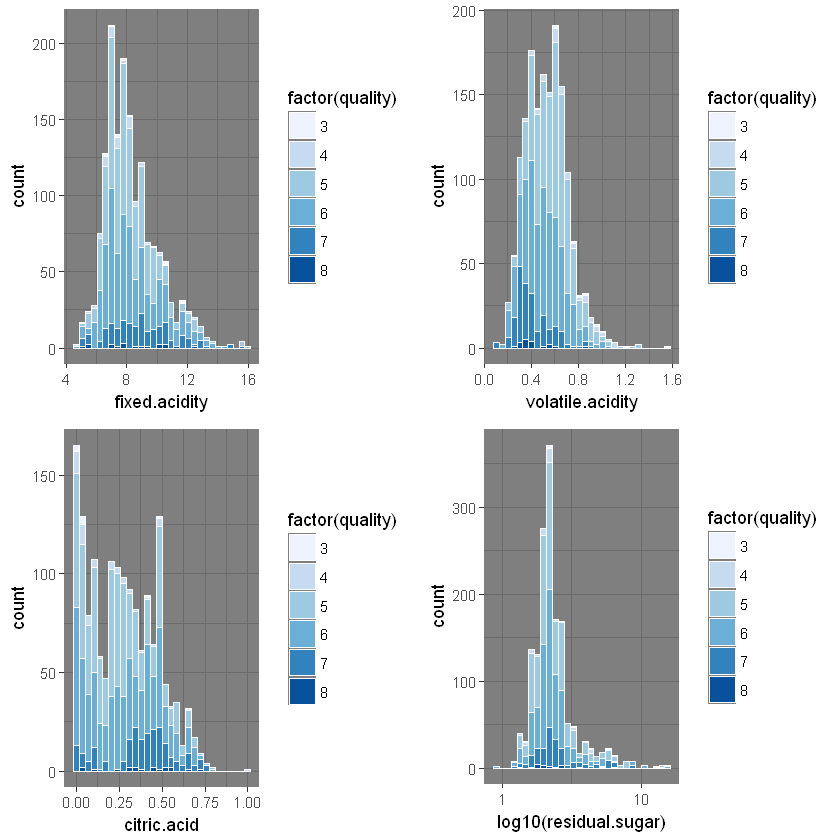

In [226]:
p1 = ggplot(aes(x=fixed.acidity, fill=factor(quality)), data=df)+
    geom_histogram(color='white') +
    scale_fill_brewer() + 
    theme_dark()
p2 = ggplot(aes(x=volatile.acidity, fill=factor(quality)), data=df)+
    geom_histogram(color='white') +
    scale_fill_brewer() + 
    theme_dark()

p3 = ggplot(aes(x=citric.acid, fill=factor(quality)), data=df)+
    geom_histogram(color='white') +
    scale_fill_brewer() + 
    theme_dark()

p4 = ggplot(aes(x=residual.sugar, fill=factor(quality)), data=df)+
    geom_histogram(color='white') +
    scale_fill_brewer() + 
    theme_dark() +
    scale_x_log10() +
    xlab("log10(residual.sugar)")

grid.arrange(p1,p2,p3,p4)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


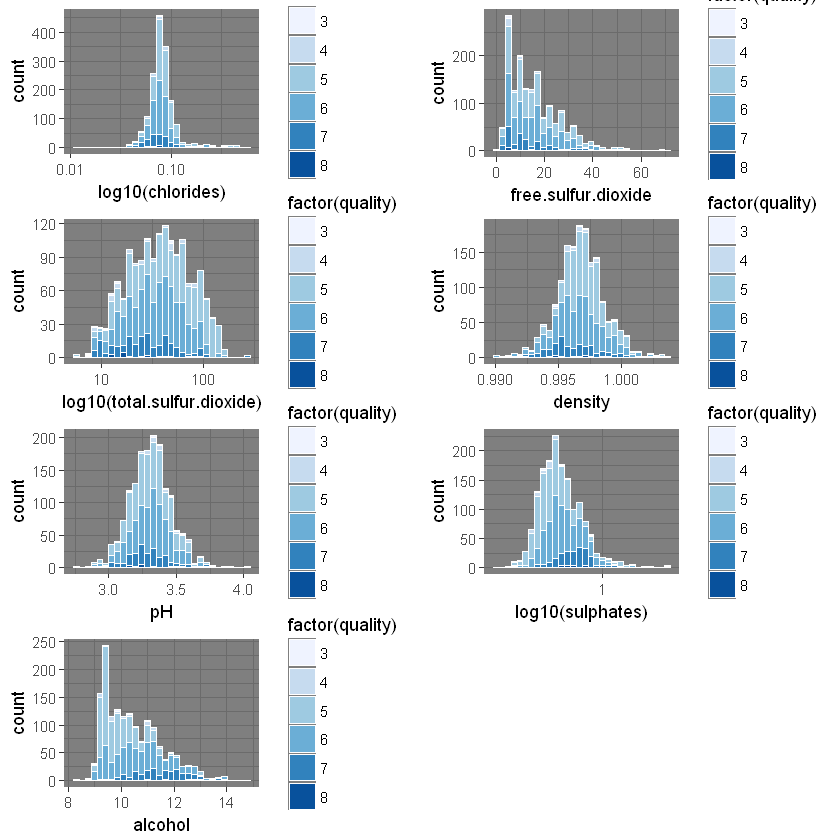

In [232]:
p5 = ggplot(aes(x=chlorides, fill=factor(quality)), data=df)+
    geom_histogram(color='white') +
    scale_fill_brewer() + 
    theme_dark() +
    scale_x_log10() +
    xlab("log10(chlorides)")

p6 = ggplot(aes(x=free.sulfur.dioxide, fill=factor(quality)), data=df)+
    geom_histogram(color='white') +
    scale_fill_brewer() + 
    theme_dark() 


p7 = ggplot(aes(x=total.sulfur.dioxide, fill=factor(quality)), data=df)+
    geom_histogram(color='white') +
    scale_fill_brewer() + 
    theme_dark() +
    scale_x_log10() +
    xlab("log10(total.sulfur.dioxide)")

p8 = ggplot(aes(x=density, fill=factor(quality)), data=df)+
    geom_histogram(color='white') +
    scale_fill_brewer() + 
    theme_dark() 

p9 = ggplot(aes(x=pH, fill=factor(quality)), data=df)+
    geom_histogram(color='white') +
    scale_fill_brewer() + 
    theme_dark() 

p10 = ggplot(aes(x=sulphates, fill=factor(quality)), data=df)+
    geom_histogram(color='white') +
    scale_fill_brewer() + 
    theme_dark() +
    scale_x_log10() + 
    xlab("log10(sulphates)")


p11 = ggplot(aes(x=alcohol, fill=factor(quality)), data=df)+
    geom_histogram(color='white') +
    scale_fill_brewer() + 
    theme_dark() 



grid.arrange(p5,p6,p7,p8,p9,p10,p11, ncol=2)

Warning message:
"Removed 6 rows containing missing values (geom_point)."Warning message:
"Removed 4 rows containing missing values (geom_point)."Warning message:
"Removed 9 rows containing missing values (geom_point)."

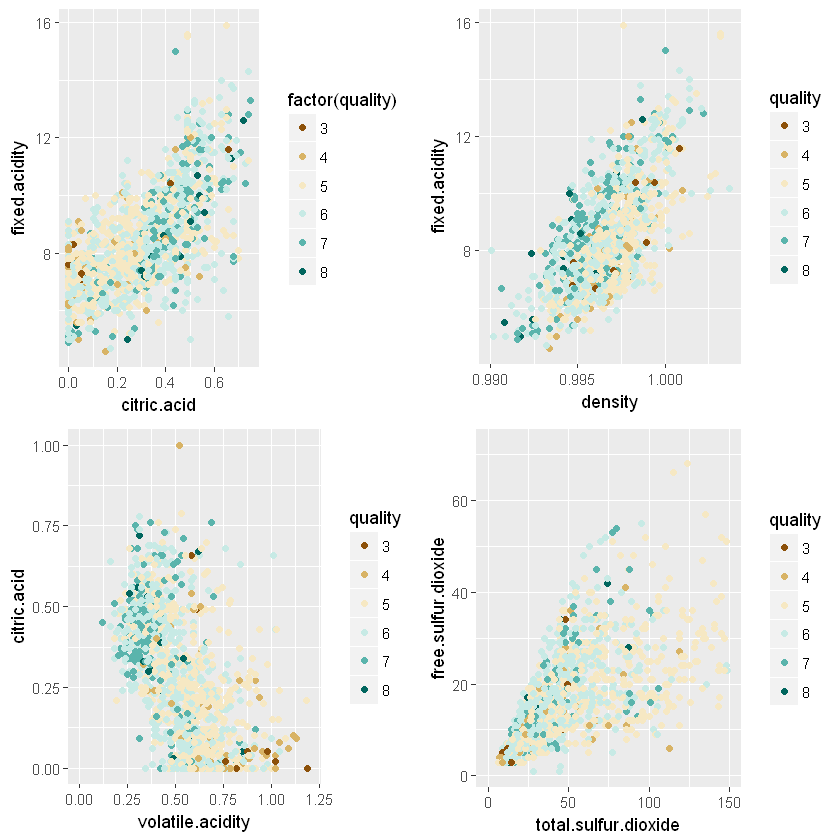

In [248]:
p1 = ggplot(aes(x=citric.acid, y=fixed.acidity), data=df)+
     geom_point(aes(color=factor(quality))) +
    scale_x_continuous(limits = c(0,0.75)) +
     scale_color_brewer(type = 'div')

p2 = ggplot(aes(x=density, y=fixed.acidity, color=quality), data=df)+
    geom_point(aes(color=factor(quality))) +
    scale_color_brewer(type = 'div')


p3 = ggplot(aes(x=volatile.acidity, y=citric.acid, color=quality), data=df)+
    geom_point(aes(color=factor(quality))) +
    scale_x_continuous(limits = c(0,1.2)) +
    scale_color_brewer(type = 'div')


p4 = ggplot(aes(x=total.sulfur.dioxide, y=free.sulfur.dioxide, color=quality), data=df)+
    geom_point(aes(color=factor(quality))) +
    scale_x_continuous(limits = c(0,150)) +
    scale_color_brewer(type = 'div')


grid.arrange(p1,p2,p3,p4)

In [222]:
## We can see there is quite significant co-relation exist among:
## citric.acid vs fixed.acidity, density vs fixed.acidity
## volatile.acidity vs citric.acid and total.sulfur.dioxide vs free.sulfur dioxide

# library(dplyr)
summary(df) 

## citric acid
## density
## volatile.acidity
## free.sulfur.dioxide
## chlorides
## pH
## sulphates
## alcohol
## residual.sugar


cond1 = (df$citric.acid <= 0.09) 
cond2 = ifelse(df$citric.acid <= 0.42, 'medium', 'high')
df$citric.acid.factor = as.factor(ifelse(cond1, 'low', cond2))
# as.factor(df$citric.acid.factor)
# levels(df$citric.acid.factor)
# names(df)

cond1 = (df$density <= 0.9956) 
cond2 = ifelse(df$density <= 0.9978, 'medium', 'high')
df$density.factor = as.factor(ifelse(cond1, 'low', cond2))


cond1 = (df$volatile.acidity <= 0.09) 
cond2 = ifelse(df$volatile.acidity <= 0.42, 'medium', 'high')
df$volatile.acidity.factor = as.factor(ifelse(cond1, 'low', cond2))

# cond1 = (df$citric.acid <= 0.09) 
# cond2 = ifelse(df$citric.acid <= 0.42, 'medium', 'high')
# df$citric.acid.factor = as.factor(ifelse(cond1, 'low', cond2))

# cond1 = (df$citric.acid <= 0.09) 
# cond2 = ifelse(df$citric.acid <= 0.42, 'medium', 'high')
# df$citric.acid.factor = as.factor(ifelse(cond1, 'low', cond2))

# cond1 = (df$citric.acid <= 0.09) 
# cond2 = ifelse(df$citric.acid <= 0.42, 'medium', 'high')
# df$citric.acid.factor = as.factor(ifelse(cond1, 'low', cond2))

# cond1 = (df$citric.acid <= 0.09) 
# cond2 = ifelse(df$citric.acid <= 0.42, 'medium', 'high')
# df$citric.acid.factor = as.factor(ifelse(cond1, 'low', cond2))

# cond1 = (df$citric.acid <= 0.09) 
# cond2 = ifelse(df$citric.acid <= 0.42, 'medium', 'high')
# df$citric.acid.factor = as.factor(ifelse(cond1, 'low', cond2))

# cond1 = (df$citric.acid <= 0.09) 
# cond2 = ifelse(df$citric.acid <= 0.42, 'medium', 'high')
# df$citric.acid.factor = as.factor(ifelse(cond1, 'low', cond2))

       X          fixed.acidity   volatile.acidity  citric.acid   
 Min.   :   1.0   Min.   : 4.60   Min.   :0.1200   Min.   :0.000  
 1st Qu.: 400.5   1st Qu.: 7.10   1st Qu.:0.3900   1st Qu.:0.090  
 Median : 800.0   Median : 7.90   Median :0.5200   Median :0.260  
 Mean   : 800.0   Mean   : 8.32   Mean   :0.5278   Mean   :0.271  
 3rd Qu.:1199.5   3rd Qu.: 9.20   3rd Qu.:0.6400   3rd Qu.:0.420  
 Max.   :1599.0   Max.   :15.90   Max.   :1.5800   Max.   :1.000  
 residual.sugar     chlorides       free.sulfur.dioxide total.sulfur.dioxide
 Min.   : 0.900   Min.   :0.01200   Min.   : 1.00       Min.   :  6.00      
 1st Qu.: 1.900   1st Qu.:0.07000   1st Qu.: 7.00       1st Qu.: 22.00      
 Median : 2.200   Median :0.07900   Median :14.00       Median : 38.00      
 Mean   : 2.539   Mean   :0.08747   Mean   :15.87       Mean   : 46.47      
 3rd Qu.: 2.600   3rd Qu.:0.09000   3rd Qu.:21.00       3rd Qu.: 62.00      
 Max.   :15.500   Max.   :0.61100   Max.   :72.00       Max.   :289.0

[1] "high"   "low"    "medium"

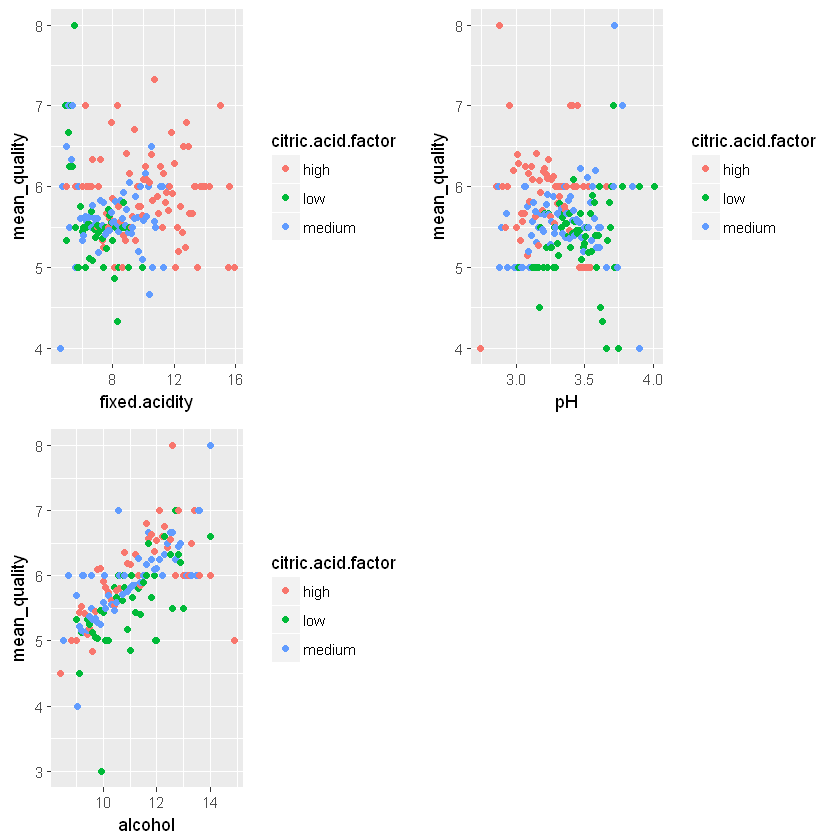

In [233]:
## wrt citric.acid.factor
#library(dplyr)

df_fixed.acidity = df %>%
    group_by(fixed.acidity, citric.acid.factor) %>%
    summarise(mean_quality = mean(quality),
              n=n()) %>%
    ungroup()
p1 = ggplot(aes(x=fixed.acidity, y=mean_quality), data=df_fixed.acidity) +
    geom_point(aes(color=citric.acid.factor)) 
#     scale_color_brewer()


# df_volatile.acidity = df %>%
#     group_by(volatile.acidity, citric.acid.factor) %>%
#     summarise(mean_quality = mean(quality),
#              n=n())  %>%
#     ungroup()
# p2 = ggplot(aes(x=volatile.acidity, y=mean_quality), data=df_volatile.acidity) +
#     geom_point(aes(color=citric.acid.factor))

# df_citric.acid = df %>%
#     group_by(citric.acid, citric.acid.factor) %>%
#     summarise(mean_quality = mean(quality),
#              n=n())  %>%
#     ungroup()
# p3 = ggplot(aes(x=citric.acid, y=mean_quality), data=df_citric.acid) +
#     geom_point(aes(color=citric.acid.factor))

# df_residual.sugar = df %>%
#     group_by(residual.sugar, citric.acid.factor) %>%
#     summarise(mean_quality = mean(quality),
#              n=n())  %>%
#     ungroup()
# p4 = ggplot(aes(x=residual.sugar, y=mean_quality), data=df_residual.sugar) +
#     geom_point(aes(color=citric.acid.factor))


# df_chlorides = df %>%
#     group_by(chlorides, citric.acid.factor) %>%
#     summarise(mean_quality = mean(quality),
#              n=n())  %>%
#     ungroup()
# p5 = ggplot(aes(x=chlorides, y=mean_quality), data=df_chlorides) +
#     geom_point(aes(color=citric.acid.factor))

# df_free.sulfur.dioxide = df %>%
#     group_by(free.sulfur.dioxide, citric.acid.factor) %>%
#     summarise(mean_quality = mean(quality),
#              n=n())  %>%
#     ungroup()
# p6 = ggplot(aes(x=free.sulfur.dioxide, y=mean_quality), data=df_free.sulfur.dioxide) +
#     geom_point(aes(color=citric.acid.factor))

# df_total.sulfur.dioxide = df %>%
#     group_by(total.sulfur.dioxide, citric.acid.factor) %>%
#     summarise(mean_quality = mean(quality),
#              n=n())  %>%
#     ungroup()
# p7 = ggplot(aes(x=total.sulfur.dioxide, y=mean_quality), data=df_total.sulfur.dioxide) +
#     geom_point(aes(color=citric.acid.factor))

# df_density = df %>%
#     group_by(density, citric.acid.factor) %>%
#     summarise(mean_quality = mean(quality),
#              n=n())  %>%
#     ungroup()
# p8 = ggplot(aes(x=density, y=mean_quality), data=df_density) +
#     geom_point(aes(color=citric.acid.factor))


df_pH = df %>%
    group_by(pH, citric.acid.factor) %>%
    summarise(mean_quality = mean(quality),
             n=n())  %>%
    ungroup()
p9 = ggplot(aes(x=pH, y=mean_quality), data=df_pH) +
    geom_point(aes(color=citric.acid.factor))

# df_sulphates = df %>%
#     group_by(sulphates, citric.acid.factor) %>%
#     summarise(mean_quality = mean(quality),
#              n=n())  %>%
#     ungroup()
# p10 = ggplot(aes(x=sulphates, y=mean_quality), data=df_sulphates) +
#     geom_point(aes(color=citric.acid.factor))

df_alcohol = df %>%
    group_by(alcohol, citric.acid.factor) %>%
    summarise(mean_quality = mean(quality),
             n=n())  %>%
    ungroup()
p11 = ggplot(aes(x=alcohol, y=mean_quality), data=df_alcohol) +
    geom_point(aes(color=citric.acid.factor))


grid.arrange(p1,p9,p11, ncol=2)

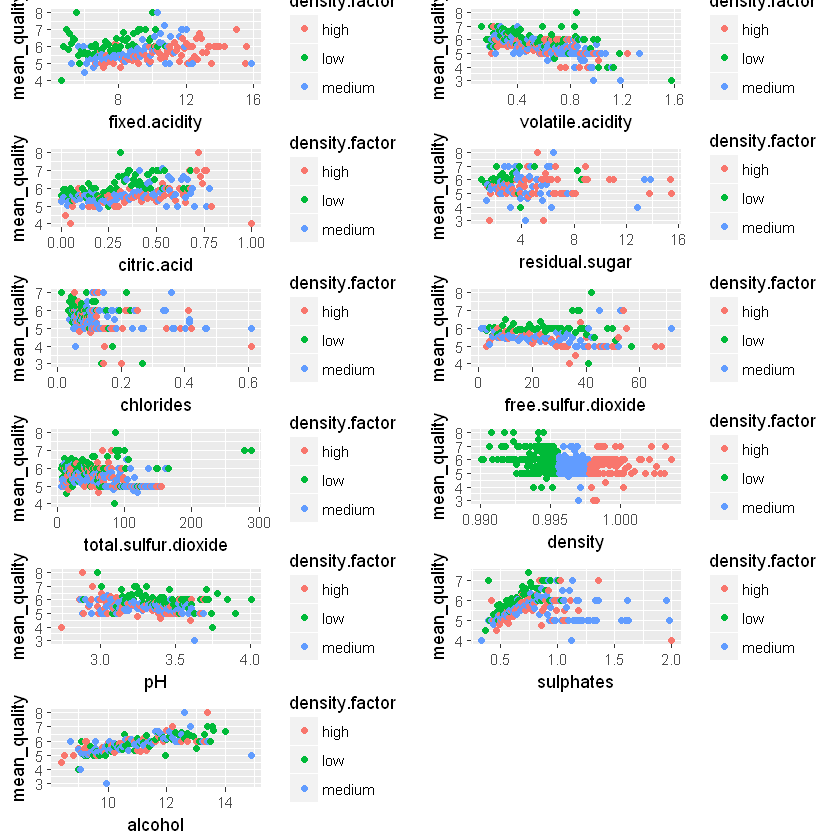

In [224]:
## wrt density.factor
#library(dplyr)
df_fixed.acidity = df %>%
    group_by(fixed.acidity, density.factor) %>%
    summarise(mean_quality = mean(quality),
              n=n()) %>%
    ungroup()
p1 = ggplot(aes(x=fixed.acidity, y=mean_quality), data=df_fixed.acidity) +
    geom_point(aes(color=density.factor)) 
#     scale_color_brewer()


df_volatile.acidity = df %>%
    group_by(volatile.acidity, density.factor) %>%
    summarise(mean_quality = mean(quality),
             n=n())  %>%
    ungroup()
p2 = ggplot(aes(x=volatile.acidity, y=mean_quality), data=df_volatile.acidity) +
    geom_point(aes(color=density.factor))

df_citric.acid = df %>%
    group_by(citric.acid, density.factor) %>%
    summarise(mean_quality = mean(quality),
             n=n())  %>%
    ungroup()
p3 = ggplot(aes(x=citric.acid, y=mean_quality), data=df_citric.acid) +
    geom_point(aes(color=density.factor))

df_residual.sugar = df %>%
    group_by(residual.sugar, density.factor) %>%
    summarise(mean_quality = mean(quality),
             n=n())  %>%
    ungroup()
p4 = ggplot(aes(x=residual.sugar, y=mean_quality), data=df_residual.sugar) +
    geom_point(aes(color=density.factor))


df_chlorides = df %>%
    group_by(chlorides, density.factor) %>%
    summarise(mean_quality = mean(quality),
             n=n())  %>%
    ungroup()
p5 = ggplot(aes(x=chlorides, y=mean_quality), data=df_chlorides) +
    geom_point(aes(color=density.factor))

df_free.sulfur.dioxide = df %>%
    group_by(free.sulfur.dioxide, density.factor) %>%
    summarise(mean_quality = mean(quality),
             n=n())  %>%
    ungroup()
p6 = ggplot(aes(x=free.sulfur.dioxide, y=mean_quality), data=df_free.sulfur.dioxide) +
    geom_point(aes(color=density.factor))

df_total.sulfur.dioxide = df %>%
    group_by(total.sulfur.dioxide, density.factor) %>%
    summarise(mean_quality = mean(quality),
             n=n())  %>%
    ungroup()
p7 = ggplot(aes(x=total.sulfur.dioxide, y=mean_quality), data=df_total.sulfur.dioxide) +
    geom_point(aes(color=density.factor))

df_density = df %>%
    group_by(density, density.factor) %>%
    summarise(mean_quality = mean(quality),
             n=n())  %>%
    ungroup()
p8 = ggplot(aes(x=density, y=mean_quality), data=df_density) +
    geom_point(aes(color=density.factor))


df_pH = df %>%
    group_by(pH, density.factor) %>%
    summarise(mean_quality = mean(quality),
             n=n())  %>%
    ungroup()
p9 = ggplot(aes(x=pH, y=mean_quality), data=df_pH) +
    geom_point(aes(color=density.factor))

df_sulphates = df %>%
    group_by(sulphates, density.factor) %>%
    summarise(mean_quality = mean(quality),
             n=n())  %>%
    ungroup()
p10 = ggplot(aes(x=sulphates, y=mean_quality), data=df_sulphates) +
    geom_point(aes(color=density.factor))

df_alcohol = df %>%
    group_by(alcohol, density.factor) %>%
    summarise(mean_quality = mean(quality),
             n=n())  %>%
    ungroup()
p11 = ggplot(aes(x=alcohol, y=mean_quality), data=df_alcohol) +
    geom_point(aes(color=density.factor))









grid.arrange(p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11, ncol=2)

In [196]:
## We can see there is quite significant co-relation exist among:
## citric.acid vs fixed.acidity, density vs fixed.acidity
## volatile.acidity vs citric.acid and total.sulfur.dioxide vs free.sulfur dioxide

# library(dplyr)
summary(df) 

## citric acid
## density
## volatile.acidity
## free.sulfur.dioxide
## chlorides
## pH
## sulphates
## alcohol
## residual.sugar


cond1 = (df$citric.acid <= 0.09) 
cond2 = ifelse(df$citric.acid <= 0.42, 'medium', 'high')
df$citric.acid.factor = as.factor(ifelse(cond1, 'low', cond2))
# as.factor(df$citric.acid.factor)

levels(df$citric.acid.factor)



       X          fixed.acidity   volatile.acidity  citric.acid   
 Min.   :   1.0   Min.   : 4.60   Min.   :0.1200   Min.   :0.000  
 1st Qu.: 400.5   1st Qu.: 7.10   1st Qu.:0.3900   1st Qu.:0.090  
 Median : 800.0   Median : 7.90   Median :0.5200   Median :0.260  
 Mean   : 800.0   Mean   : 8.32   Mean   :0.5278   Mean   :0.271  
 3rd Qu.:1199.5   3rd Qu.: 9.20   3rd Qu.:0.6400   3rd Qu.:0.420  
 Max.   :1599.0   Max.   :15.90   Max.   :1.5800   Max.   :1.000  
 residual.sugar     chlorides       free.sulfur.dioxide total.sulfur.dioxide
 Min.   : 0.900   Min.   :0.01200   Min.   : 1.00       Min.   :  6.00      
 1st Qu.: 1.900   1st Qu.:0.07000   1st Qu.: 7.00       1st Qu.: 22.00      
 Median : 2.200   Median :0.07900   Median :14.00       Median : 38.00      
 Mean   : 2.539   Mean   :0.08747   Mean   :15.87       Mean   : 46.47      
 3rd Qu.: 2.600   3rd Qu.:0.09000   3rd Qu.:21.00       3rd Qu.: 62.00      
 Max.   :15.500   Max.   :0.61100   Max.   :72.00       Max.   :289.0

[1] "high"   "low"    "medium"

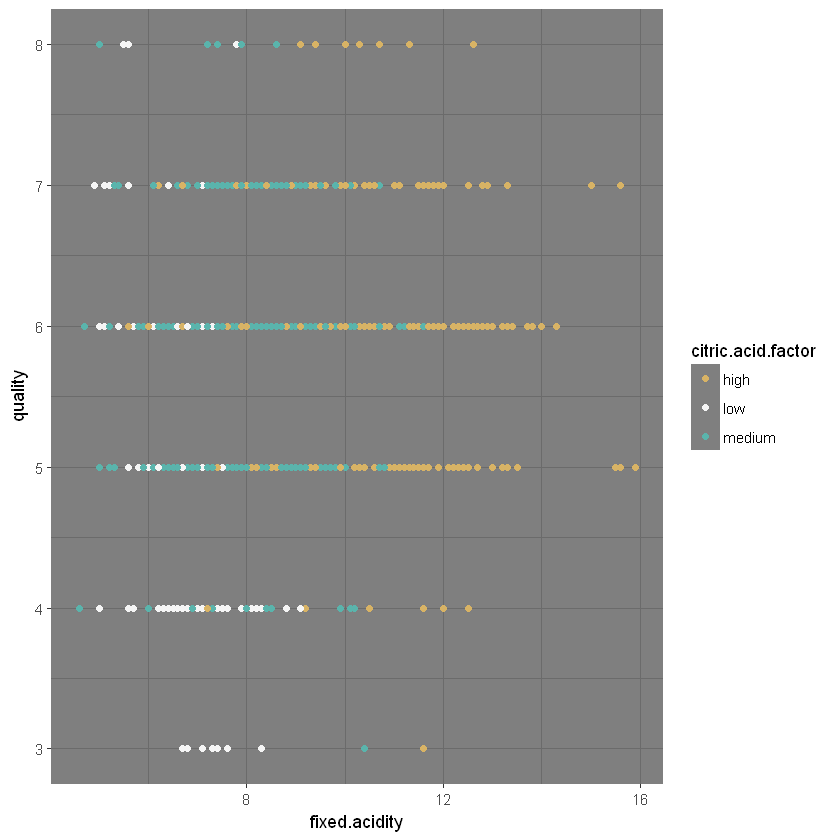

In [176]:
ggplot(aes(x=fixed.acidity,y=quality), data=df)+
    geom_point(aes(color=citric.acid.factor)) +
    scale_color_brewer(type='div') + 
    theme_dark()


In [119]:
## The most rated wine
subset(df, quality>=8)



,X,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
268,268,7.9,0.35,0.46,3.6,0.078,15,37,0.99730,3.35,0.86,12.8,8
279,279,10.3,0.32,0.45,6.4,0.073,5,13,0.99760,3.23,0.82,12.6,8
391,391,5.6,0.85,0.05,1.4,0.045,12,88,0.99240,3.56,0.82,12.9,8
441,441,12.6,0.31,0.72,2.2,0.072,6,29,0.99870,2.88,0.82,9.8,8
456,456,11.3,0.62,0.67,5.2,0.086,6,19,0.99880,3.22,0.69,13.4,8
482,482,9.4,0.30,0.56,2.8,0.080,6,17,0.99640,3.15,0.92,11.7,8
496,496,10.7,0.35,0.53,2.6,0.070,5,16,0.99720,3.15,0.65,11.0,8
499,499,10.7,0.35,0.53,2.6,0.070,5,16,0.99720,3.15,0.65,11.0,8
589,589,5.0,0.42,0.24,2.0,0.060,19,50,0.99170,3.72,0.74,14.0,8
829,829,7.8,0.57,0.09,2.3,0.065,34,45,0.99417,3.46,0.74,12.7,8
